# Lab 8: Twitter API with Tweepy

Welcome to lab 8! In this session, you will set up your own Twitter API credentials so you can access the Twitter API from Python using `tweepy`.

If you have launched this notebook in `binder` the `tweepy` library should already have been installed on the underlying virtual machine that the copy of Jupyter Notebook is running in. If you have downloaded this notebook to use on your own computer (or in the CTR), you might need to install `tweepy` first before running this notebook. To install `tweepy`, open up the command-line (`Command prompt` on Windows, or `Git Bash` in the CTR) and type:

```
conda install tweepy
```

and press Enter. Some text should whiz by indicating that it's installing various things. Once that is done, please restart Jupyter Notebook.

For full documentation about how to use `tweepy` you can reference here: http://www.tweepy.org

<img src="twitter-python-json.png/">

Essentially what we are going to do is to use Python to query Twitter's Web-based API, which will return us some JSON data. We can transform this JSON into something that we can play with - a `DataFrame`.

### Import our libraries

In [2]:
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

Before we can do anything, you need to sign up to Twitter (if you haven't already got an account) so that Twitter can grant you programmatic access credentials. Access is free, but there are limitations for non-commercial access.

To get your consumer and access credentials set up, please follow the instructions found here: https://www.gabfirethemes.com/create-twitter-api-key/

In [3]:
# Enter your Twitter API key and access tokens here
api_key = 'rehd0tCgEDe9YiscMejL3U113'
api_secret = 'qCc05kcA11pNpLTNzRyu20R6k3hb2plrpR0gCnuDJ39quQvxDx'
access_token = '257015422-r1LERguwzS2Q3dPnoy0lyuw588gdKznffiCv4Uy6'
access_token_secret = '9PnxyUZr3zVZNkLhE0xDoohTPm2saODIak3jYZdy9iSTN'

In [4]:
# Set up the Auth Tweepy object. This takes your credentials from above
# and does some authentication with Twitter
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit_notify=True, wait_on_rate_limit=True)

Now let's extract some tweets for a particular user. For example, we could use `realDonaldTrump` or another screen name of a Twitter user (you can choose your own if you wish).

In [5]:
# Fill in the blanks below. screen_name should be a string of the user 
# we wish to gather tweets from. count is the number of tweets.
tweets = api.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @FLOTUS: Greetings from @WhiteHouse https://t.co/mjuHFqglYz

Remember when they were saying, during the campaign, that Donald Trump is giving great speeches and drawing big cro… https://t.co/tmNjLRpLXI

Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he t… https://t.co/4e33ZxnAw7

Democrats refused to take care of DACA. Would have been so easy, but they just didn’t care. I had to fight for Military and start of Wall.

Got $1.6 Billion to start Wall on Southern Border, rest will be forthcoming. Most importantly, got $700 Billion to… https://t.co/0uCYCqGbgf



### Creating a DataFrame

Next, create a `DataFrame` from the tweets gathered in the previous step. Essentially we have a series of tweets, so this should be straightforward.

In [6]:
# Each tweet from above is an object that holds many properties about
# each tweet. Here, we use a Python structure called a list comprehension
# to only extract the tweet text, given by tweet.text on each tweet 
# found in the tweets collection returned above.
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data.head(10)

,Tweets
0,RT @FLOTUS: Greetings from @WhiteHouse https:/...
1,"Remember when they were saying, during the cam..."
2,Crazy Joe Biden is trying to act like a tough ...
3,Democrats refused to take care of DACA. Would ...
4,Got $1.6 Billion to start Wall on Southern Bor...
5,.....They can help solve problems with North K...
6,I called President Putin of Russia to congratu...
7,"“Special Council is told to find crimes, wheth..."
8,...there was no probable cause for believing t...
9,Department of Justice should have urged the Su...


Now we have a simple table based on the text of tweets. Let's take a look at what other things we might be able to extract from a `tweet` object. 

In [7]:
# dir gives us a directory of attributes that we can access using the 
# dot method on an object. Ignore everything enclosed with underscores, 
# as these are for internal Python use only.
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


We can see here, there are other intersting attributes such as:

In [8]:
# Print some info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)

976869330020458500
2018-03-22 17:12:52


In [9]:
# Add a print statment to print out the following 
print( tweets[0].source )  # tweet source
print( tweets[0].favorite_count )  # number of favourites
print( tweets[0].retweet_count )  # number of retweets
print( tweets[0].geo )  # geographical information
print( tweets[0].coordinates )  # coordinates of the tweet
print( tweets[0].entities )  # other entities related to the tweet

Twitter for iPhone
0
4905
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FLOTUS', 'name': 'Melania Trump', 'id': 818876014390603776, 'id_str': '818876014390603776', 'indices': [3, 10]}, {'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [27, 38]}], 'urls': [], 'media': [{'id': 976821030089043969, 'id_str': '976821030089043969', 'indices': [39, 62], 'media_url': 'http://pbs.twimg.com/media/DY5djSuWsAE1E_H.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DY5djSuWsAE1E_H.jpg', 'url': 'https://t.co/mjuHFqglYz', 'display_url': 'pic.twitter.com/mjuHFqglYz', 'expanded_url': 'https://twitter.com/FLOTUS/status/976821034925076480/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 957, 'h': 640, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 957, 'h': 640, 'resize': 'fit'}, 'small': {'w': 680, 'h': 455, 'resize': 'fit'}}, 'source_status_id': 9768210349

Let's add some columns to our `DataFrame`. Use what you have learned about how to add columns to an existing `DataFrame`, and using the list comprehension pattern from above to add some more relevant data that we can then process.

In [10]:
# We add relevant data:
data['len']  = [len(tweet.text) for tweet in tweets]  # number of characters in a tweet (think length)
data['ID']   = [tweet.id for tweet in tweets]
data['Date'] = [tweet.created_at for tweet in tweets]
data['Source'] = [tweet.source for tweet in tweets]
data['Likes']  = [tweet.favorite_count for tweet in tweets] # favorite_count
data['RTs']    =  [tweet.retweet_count for tweet in tweets] # retweet count

In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @FLOTUS: Greetings from @WhiteHouse https:/...,62,976869330020458500,2018-03-22 17:12:52,Twitter for iPhone,0,4905
1,"Remember when they were saying, during the cam...",140,976770619424563200,2018-03-22 10:40:37,Twitter for iPhone,59561,13645
2,Crazy Joe Biden is trying to act like a tough ...,140,976765417908776963,2018-03-22 10:19:57,Twitter for iPhone,151839,48267
3,Democrats refused to take care of DACA. Would ...,138,976655903729610752,2018-03-22 03:04:47,Twitter for iPhone,61113,14334
4,Got $1.6 Billion to start Wall on Southern Bor...,139,976654851684945920,2018-03-22 03:00:36,Twitter for iPhone,77161,18452
5,.....They can help solve problems with North K...,139,976535330835836929,2018-03-21 19:05:40,Twitter for iPhone,74274,18235
6,I called President Putin of Russia to congratu...,140,976532956557737984,2018-03-21 18:56:14,Twitter for iPhone,115735,27347
7,"“Special Council is told to find crimes, wheth...",140,976420417090015232,2018-03-21 11:29:03,Twitter for iPhone,70904,17487
8,...there was no probable cause for believing t...,140,976415945714556928,2018-03-21 11:11:17,Twitter for iPhone,75828,18777
9,Department of Justice should have urged the Su...,140,976411208717950976,2018-03-21 10:52:27,Twitter for iPhone,54115,13893


**What is the average length of tweet?**

In [ ]:
mean = data['len'].mean()
print("The average length of the tweets: {}".format(mean))

**Which tweet had the most likes?**

In [12]:
fav_max = data['Likes'].max()
fav_tweet = data[data['Likes']==fav_max].index

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav_tweet]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav_tweet]))

The tweet with more likes is: 
91    Lowest rated Oscars in HISTORY. Problem is, we...
Name: Tweets, dtype: object
Number of likes: 213594
91    122
Name: len, dtype: int64 characters.



**Which tweet had the most retweets (RTs)?**

In [13]:
rt_max = data['RTs'].max()
rt_tweet = data[data['RTs']==rt_max].index

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt_tweet]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt_tweet]))

The tweet with more retweets is: 
91    Lowest rated Oscars in HISTORY. Problem is, we...
Name: Tweets, dtype: object
Number of retweets: 59524
91    122
Name: len, dtype: int64 characters.



## Time series

Note that earlier, we added a `Date` column to our `DataFrame` containing tweet data. This means we can plot or analyze time series data directly from Pandas `Series` objects. For example:

In [14]:
# We can create a time series of tweet length like this
tlen = pd.Series(data=data['len'].values, index=data['Date'])

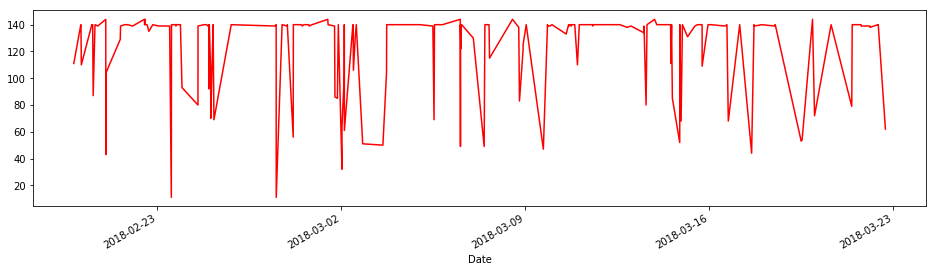

In [15]:
# ...and plot it against time
tlen.plot(figsize=(16,4), color='r')

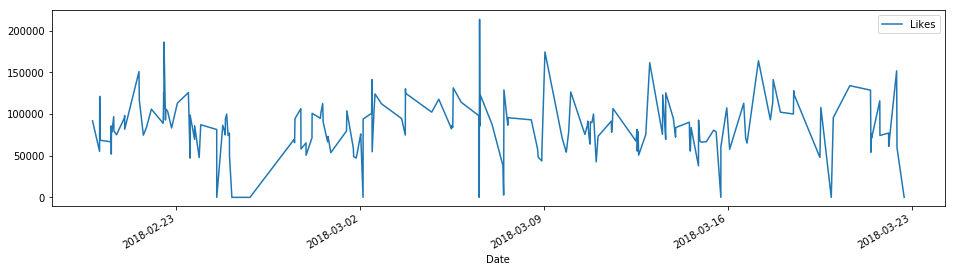

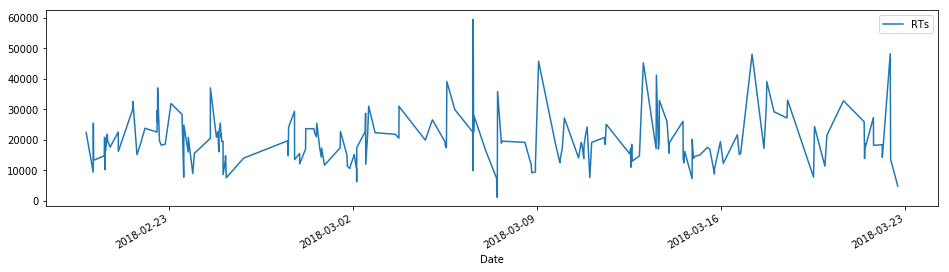

In [16]:
# Plot a likes vs retweets visualization, by getting the time series 
# for favourites and of retweets
tfav = data[['Date','Likes']].set_index('Date')
tret = data[['Date','RTs']].set_index('Date')

tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True)

When you're finished with lab 8 (or had completed what you can), choose **Save and Checkpoint** from the **File** menu, then choose **Download as Notebook** and save it to your computer or USB stick. You can then send a copy to the lecturer via Slack or email to check over.

In [17]:
data.to_csv('tweets.csv')